# DETERMINACIÓN DE LA CAPACIDAD DISPONIBLE POR UN CONSUMIDOR DOMÉSTICOPARA REALIZAR LA RECARGA DEL VE SIN AMPLIAR LA POTENCIA

In [1]:
%%html
<style>
img {
  display: block;
  margin-left: auto;
  margin-right: auto;
}

table {
  display: block;
  margin-left: auto;
  margin-right: auto;
}


.dataframe {
  display: block;
  margin-left: auto;
  margin-right: auto;
  width: 40%;
}


</style>
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>

<form action="javascript:code_toggle()"><input type="submit" value=""></form>


In [ ]:
# https://github.com/knyete/PythonDataScienceHandbook/blob/master/notebooks/04.10-Customizing-Ticks.ipynb

ANEXO 3 DE LA GUÍA. 
# [DETERMINACIÓN DE LA CAPACIDAD DISPONIBLE POR UN CONSUMIDOR DOMÉSTICOPARA REALIZAR LA RECARGA DEL VE SIN AMPLIAR LA POTENCIA.](http://www.f2i2.net/documentos/lsiF2I2/rbt/guias/guia_bt_52_nov17R1.pdf)

## Introduccion

El operador del sistema [(Red Eléctrica de España)](https://www.ree.es/es/clientes/consumidor/gestion-medidas-electricas/consulta-perfiles-de-consumo), calcula y publica regularmente las medidas de la demanda del
sistema eléctrico peninsular y los perfiles finales de consumo. Gracias al proyecto perfila, estos perfiles de consumo
aplicables a los consumidores domésticos se han podido determinar con precisión.

En base a esta información, y con el objetivo de poder estimar de una manera razonable y robusta el margen de
capacidad libre o “hueco” que tendrían los consumidores domésticos para realizar la cargar nocturna del VE, se han
tomado los valores máximos para cada periodo horario del coeficiente de perfilado A publicado por REE durante el
año 2015. Estos valores, ajustados en base 100 para el valor máximo de dicho coeficiente horario, han sido
representados en la siguiente gráfica.

In [2]:
filename='perfiles_iniciales_2021.xlsx'
# 4. Clasificación de consumidoresa) 
# Para el conjunto de perfiles I recogidos en el anexo III se establecen los siguientes perfiles:
# 1.º Perfil  tipo  Pa:  De  aplicación  a  la  categoría  de  consumidores  con  peajes  de  acceso 2.0 A y 2.1 A.
# 2.º Perfil  tipo  Pb:  De  aplicación  a  la  categoría  de  consumidores  con  peajes  de  acceso 2.0 DHA y 2.1 DHA.
# 3.º Perfil  tipo  Pc:  De  aplicación  a  la  categoría  de  consumidores  con  peajes  de  acceso 3.0 A y 3.1  A  con  registro  en 6  períodos,  de  acuerdo  con  lo  establecido  en  el  punto 5.a) siguiente.
# 4.º Perfil tipo Pd: De aplicación a la categoría consumidores con peaje de acceso 2.0 DHS y 2.1 DHS.


In [3]:
# para produccion descomentar al final p y comentar d

from flask import (render_template, redirect, url_for)
# curvas anuales
import urllib.parse
import urllib.request
import json
import datetime
from numpy.lib.function_base import diff
import pandas as pd
import requests as requests
from numpy import *
import matplotlib.pyplot as plt
import base64
from io import BytesIO
import io
from matplotlib.figure import Figure
import numpy as np
from windrose import WindroseAxes
import warnings
warnings.filterwarnings('ignore')

def readAllSheets(filename):
    xls = pd.ExcelFile(filename)
    sheets = xls.sheet_names
    libro = {}
    for sheet in sheets:
        libro[sheet] = xls.parse(sheet, index_col=0)
        libro[sheet] = libro[sheet].fillna('')
    xls.close()
    
    return libro

In [4]:
libro = readAllSheets(filename)
hojas = libro.keys()

In [5]:
from datetime import datetime, timedelta
df=libro['Perfiles Iniciales_hasta032021']

df.columns = df.iloc[0]
df = df[1:]
df['Mes']=df.index.to_list()
df=df.reset_index(drop=True)
# df
dti = pd.date_range("2021-01-01 01:00:00", periods=df.shape[0], freq="H")
df['dti']=dti
df = df.set_index('dti')
df=df.rename(columns={'': 'Demanda de Referencia 2021 (MW)'})

In [37]:
ss=df.loc[dia]['Pa,0m,d,h'].max()
# df.loc[dia]['Pa,0m,d,h'].apply(lambda x: 100*x)



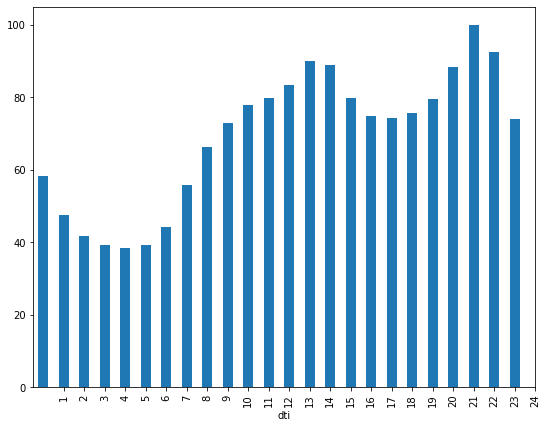

In [38]:
dia='2021-05-10'
ax=df.loc[dia]['Pa,0m,d,h'].apply(lambda x: 100*x/ss).plot(kind="bar",figsize=(9, 7),xticks=(df.loc[dia].Hora.to_list()))

De  esta  manera,  se  obtiene  el  ratio  horario  de  uso  de  la  capacidad  disponible  por  un  consumidor  doméstico. Suponiendo que los VE fuera programadospara que iniciaran su carga a partir de la 1 de la mañana (hora de inicio de la tarifa de acceso supervalle, que coincide además con los precios más bajos de la energía en el mercado), un consumidor  doméstico  tendría  disponible  en  un  escenario  de  máxima  demanda  para  esta  hora,  prácticamente  el 50% de su capacidad de punta para poder realizar esta recarga. 

En caso el de que se comprobara que los VE conectados a los puntos de recarga de las viviendas no realizan en su mayoría una recarga lenta a partir de esta hora, este coeficiente debería ser recalculado.